学习{mlr3verse}集成学习。

In [2]:
library(tidyverse)
library(mlr3verse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: mlr3



In [3]:
lrn()

<DictionaryLearner> with 176 stored values
Keys: classif.AdaBoostM1, classif.C50, classif.IBk, classif.J48,
  classif.JRip, classif.LMT, classif.OneR, classif.PART, classif.abess,
  classif.bart, classif.bayes_net, classif.catboost, classif.cforest,
  classif.ctree, classif.cv_glmnet, classif.debug,
  classif.decision_stump, classif.decision_table, classif.earth,
  classif.featureless, classif.fnn, classif.gam, classif.gamboost,
  classif.gausspr, classif.gbm, classif.glmboost, classif.glmer,
  classif.glmnet, classif.imbalanced_rfsrc, classif.kknn,
  classif.kstar, classif.ksvm, classif.lda, classif.liblinear,
  classif.lightgbm, classif.log_reg, classif.logistic, classif.lssvm,
  classif.mob, classif.multilayer_perceptron, classif.multinom,
  classif.naive_bayes, classif.naive_bayes_multinomial,
  classif.naive_bayes_weka, classif.nnet, classif.priority_lasso,
  classif.qda, classif.randomForest, classif.random_forest_weka,
  classif.random_tree, classif.ranger, classif.reptree, clas

# Boost

In [26]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习期
lrn_adboost <- lrn("classif.AdaBoostM1", W = "weka.classifiers.rules.JRip")

# 训练
lrn_adboost$train(tsk_german)

# 预测
pred_adboost <- lrn_adboost$predict(tsk_german)

# 评估
pred_adboost$score(msr("classif.acc"))

# classif.acc: 0.737

classif.acc 
      0.805

In [ ]:
lrn_adboost$param_set %>%
  as.data.table() %>%
  select(id, default, class, lower, upper) %>%
  print()

# id        default    class lower upper
#                        <char>         <list>   <char> <num> <num>
#  1:                    subset <NoDefault[0]> ParamUty    NA    NA
#  2:                 na.action <NoDefault[0]> ParamUty    NA    NA
#  3:                         P            100 ParamInt    90   100
#  4:                         Q          FALSE ParamLgl    NA    NA
#  5:                         S              1 ParamInt     1   Inf
#  6:                         I             10 ParamInt     1   Inf
#  7:                         W  DecisionStump ParamUty    NA    NA
#  8:         output_debug_info          FALSE ParamLgl    NA    NA
#  9: do_not_check_capabilities          FALSE ParamLgl    NA    NA
# 10:        num_decimal_places              2 ParamInt     1   Inf
# 11:                batch_size            100 ParamInt     1   Inf
# 12:                   options         [NULL] ParamUty    NA    NA

                           id        default    class lower upper
                       <char>         <list>   <char> <num> <num>
 1:                    subset <NoDefault[0]> ParamUty    NA    NA
 2:                 na.action <NoDefault[0]> ParamUty    NA    NA
 3:                         P            100 ParamInt    90   100
 4:                         Q          FALSE ParamLgl    NA    NA
 5:                         S              1 ParamInt     1   Inf
 6:                         I             10 ParamInt     1   Inf
 7:                         W  DecisionStump ParamUty    NA    NA
 8:         output_debug_info          FALSE ParamLgl    NA    NA
 9: do_not_check_capabilities          FALSE ParamLgl    NA    NA
10:        num_decimal_places              2 ParamInt     1   Inf
11:                batch_size            100 ParamInt     1   Inf
12:                   options         [NULL] ParamUty    NA    NA


In [27]:
lts()

<DictionaryTuningSpaces> with 36 stored values
Keys: classif.glmnet.default, classif.glmnet.rbv1, classif.glmnet.rbv2,
  classif.kknn.default, classif.kknn.rbv1, classif.kknn.rbv2,
  classif.ranger.default, classif.ranger.rbv1, classif.ranger.rbv2,
  classif.rpart.default, classif.rpart.rbv1, classif.rpart.rbv2,
  classif.svm.default, classif.svm.rbv1, classif.svm.rbv2,
  classif.xgboost.default, classif.xgboost.rbv1, classif.xgboost.rbv2,
  regr.glmnet.default, regr.glmnet.rbv1, regr.glmnet.rbv2,
  regr.kknn.default, regr.kknn.rbv1, regr.kknn.rbv2,
  regr.ranger.default, regr.ranger.rbv1, regr.ranger.rbv2,
  regr.rpart.default, regr.rpart.rbv1, regr.rpart.rbv2,
  regr.svm.default, regr.svm.rbv1, regr.svm.rbv2, regr.xgboost.default,
  regr.xgboost.rbv1, regr.xgboost.rbv2

In [61]:
# 设置种子
set.seed(123)

# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_adboost <- lrn("classif.AdaBoostM1", S = 123)

# 定义搜索空间
ps_adboost <- ps(
  # P = p_int(lower = 90, upper = 100),
  # Q = p_lgl(),
  I = p_fct(levels = 5:150)
)

# 定义调参方法
tune_adboost <- tnr("grid_search", resolution = 145)

# 并行化
future::plan("multisession", workers = 6)

# 定义调参过程
instance <- tune(
  task = tsk_german,
  learner = lrn_adboost,
  resampling = rsmp("cv", folds = 3),
  measures = msr("classif.acc"),
  search_space = ps_adboost,
  tuner = tune_adboost
)

INFO  [16:16:02.471] [bbotk] Starting to optimize 1 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [16:16:02.478] [bbotk] Evaluating 1 configuration(s)
INFO  [16:16:02.483] [mlr3] Running benchmark with 3 resampling iterations
INFO  [16:16:02.642] [mlr3] Applying learner 'classif.AdaBoostM1' on task 'german_credit' (iter 1/3)
INFO  [16:16:02.767] [mlr3] Applying learner 'classif.AdaBoostM1' on task 'german_credit' (iter 2/3)
INFO  [16:16:02.960] [mlr3] Applying learner 'classif.AdaBoostM1' on task 'german_credit' (iter 3/3)
INFO  [16:16:03.119] [mlr3] Finished benchmark
INFO  [16:16:03.145] [bbotk] Result of batch 1:
INFO  [16:16:03.148] [bbotk]   I classif.acc warnings errors runtime_learners
INFO  [16:16:03.148] [bbotk]  93   0.7560105        0      0            0.533
INFO  [16:16:03.148] [bbotk]                                 uhash
INFO  [16:16:03.148] [bbotk]  552bd5cd-a436-4b49-99e7-b6bca25b7afb
INFO  [16:16:03.150] [bbotk] Evaluating 1 configuration(

In [ ]:
instance$archive %>%
  as.data.table() %>%
  select(I, classif.acc) %>%
  arrange(desc(classif.acc)) %>%
  print()

# I classif.acc
#      <char>       <num>
#   1:     78   0.7630235
#   2:    149   0.7630145
#   3:    109   0.7630115
#   4:    120   0.7630085
#   5:    129   0.7620045
#  ---                   
# 142:     15   0.7160154
# 143:     10   0.7150264
# 144:     11   0.7140194
# 145:      6   0.7130304
# 146:      5   0.7070244

          I classif.acc
     <char>       <num>
  1:     78   0.7630235
  2:    149   0.7630145
  3:    109   0.7630115
  4:    120   0.7630085
  5:    129   0.7620045
 ---                   
142:     15   0.7160154
143:     10   0.7150264
144:     11   0.7140194
145:      6   0.7130304
146:      5   0.7070244


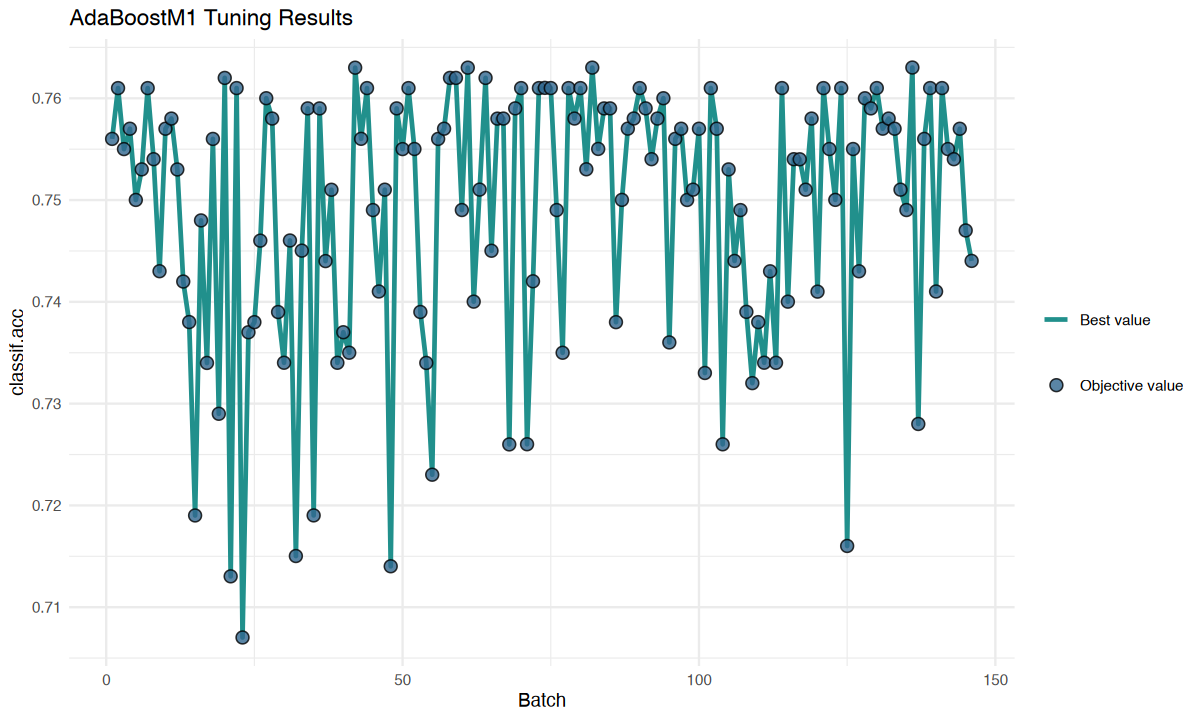

In [63]:
# 调整画布大小
options(repr.plot.width = 10, repr.plot.height = 6)

autoplot(instance, type = "performance") +
  labs(title = "AdaBoostM1 Tuning Results")

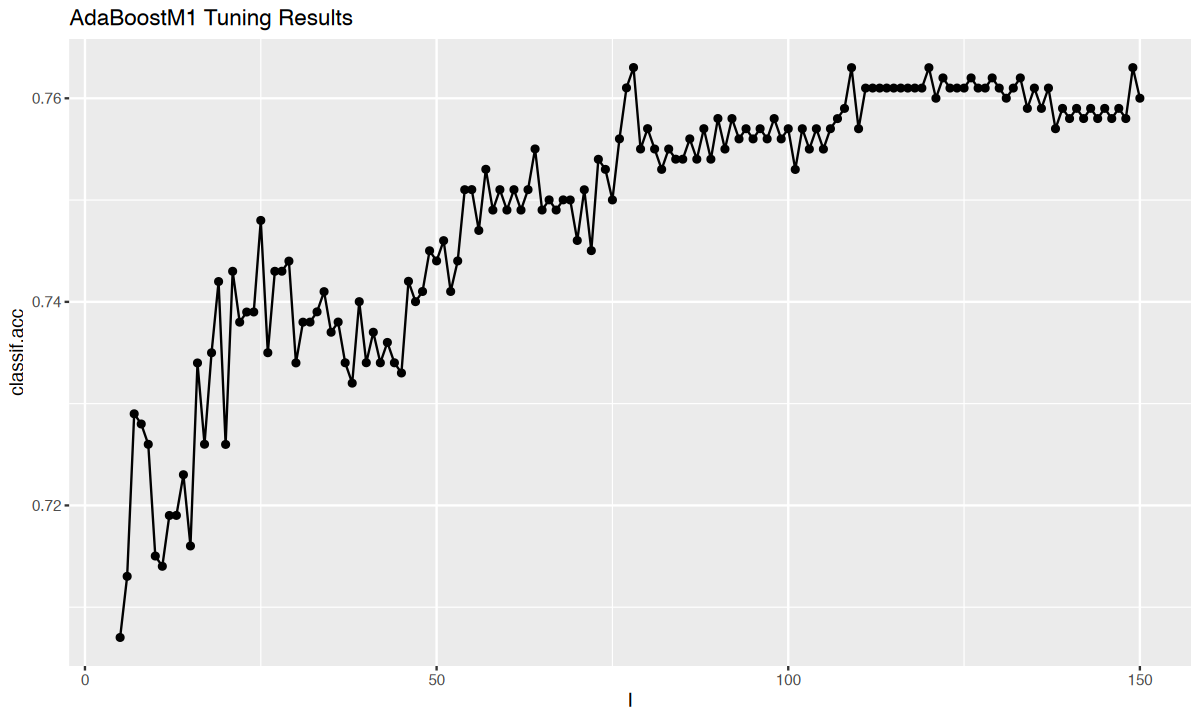

In [64]:
# 调整画布大小
options(repr.plot.width = 10, repr.plot.height = 6)

df <- instance$archive %>%
  as.data.table() %>%
  select(I, classif.acc) %>%
  mutate(I = as.integer(I)) %>%
  arrange(desc(classif.acc))

ggplot(df, aes(x = I, y = classif.acc)) +
  geom_point() +
  geom_line() +
  labs(title = "AdaBoostM1 Tuning Results")

In [65]:
# 定义任务
tsk_german <- tsk("german_credit")

# 定义学习器
lrn_adboost <- lrn("classif.AdaBoostM1", S = 123)

# 定义搜索空间
ps_adboost <- ps(
  # P = p_int(lower = 90, upper = 100),
  # Q = p_lgl(),
  I = p_fct(levels = 100:250)
)

# 定义调参方法
tune_adboost <- tnr("grid_search")

# 并行化
future::plan("multisession", workers = 6)

# 定义调参过程
instance <- tune(
  task = tsk_german,
  learner = lrn_adboost,
  resampling = rsmp("cv", folds = 3),
  measures = msr("classif.acc"),
  search_space = ps_adboost,
  tuner = tune_adboost
)

INFO  [16:17:47.029] [bbotk] Starting to optimize 1 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [16:17:47.036] [bbotk] Evaluating 1 configuration(s)
INFO  [16:17:47.042] [mlr3] Running benchmark with 3 resampling iterations
INFO  [16:17:47.177] [mlr3] Applying learner 'classif.AdaBoostM1' on task 'german_credit' (iter 1/3)
INFO  [16:17:47.290] [mlr3] Applying learner 'classif.AdaBoostM1' on task 'german_credit' (iter 2/3)
INFO  [16:17:47.516] [mlr3] Applying learner 'classif.AdaBoostM1' on task 'german_credit' (iter 3/3)
INFO  [16:17:47.739] [mlr3] Finished benchmark
INFO  [16:17:47.814] [bbotk] Result of batch 1:
INFO  [16:17:47.816] [bbotk]    I classif.acc warnings errors runtime_learners
INFO  [16:17:47.816] [bbotk]  193   0.7570295        0      0             0.97
INFO  [16:17:47.816] [bbotk]                                 uhash
INFO  [16:17:47.816] [bbotk]  f2fe1eee-a339-4be4-ad63-785665407a4a
INFO  [16:17:47.818] [bbotk] Evaluating 1 configuratio

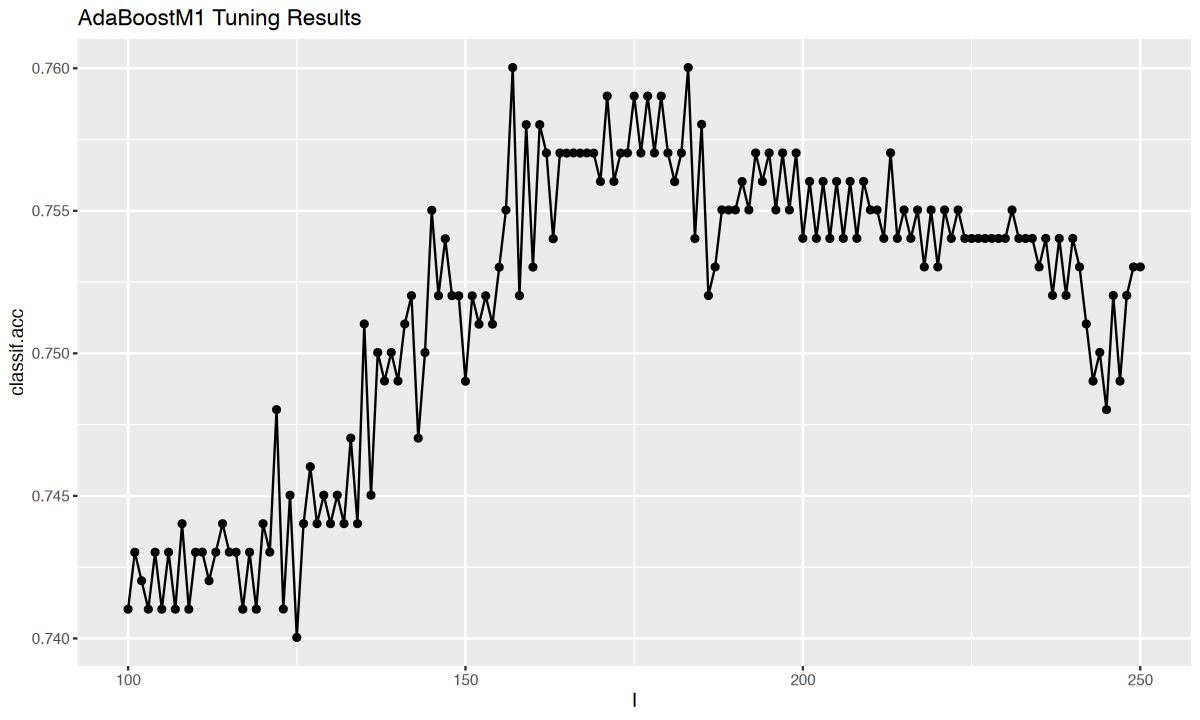

In [66]:
# 调整画布大小
options(repr.plot.width = 10, repr.plot.height = 6)

df <- instance$archive %>%
  as.data.table() %>%
  select(I, classif.acc) %>%
  mutate(I = as.integer(I)) %>%
  arrange(desc(classif.acc))

ggplot(df, aes(x = I, y = classif.acc)) +
  geom_point() +
  geom_line() +
  labs(title = "AdaBoostM1 Tuning Results")

In [ ]:
df[1:20] %>%
  print()

# I classif.acc
#     <int>       <num>
#  1:   183   0.7600265
#  2:   157   0.7600265
#  3:   177   0.7590255
#  4:   179   0.7590255
#  5:   171   0.7590255
#  6:   175   0.7590255
#  7:   185   0.7580335
#  8:   161   0.7580245
#  9:   159   0.7580245
# 10:   213   0.7570325
# 11:   193   0.7570295
# 12:   162   0.7570295
# 13:   166   0.7570295
# 14:   197   0.7570295
# 15:   174   0.7570295
# 16:   199   0.7570295
# 17:   178   0.7570295
# 18:   176   0.7570295
# 19:   180   0.7570295
# 20:   168   0.7570295
#         I classif.acc

        I classif.acc
    <int>       <num>
 1:   183   0.7600265
 2:   157   0.7600265
 3:   177   0.7590255
 4:   179   0.7590255
 5:   171   0.7590255
 6:   175   0.7590255
 7:   185   0.7580335
 8:   161   0.7580245
 9:   159   0.7580245
10:   213   0.7570325
11:   193   0.7570295
12:   162   0.7570295
13:   166   0.7570295
14:   197   0.7570295
15:   174   0.7570295
16:   199   0.7570295
17:   178   0.7570295
18:   176   0.7570295
19:   180   0.7570295
20:   168   0.7570295
        I classif.acc


# Bagging

In [ ]:
# 设定单独学习器
gr_single_pred <- po("subsample", frac = 0.7) %>>%
  lrn("classif.rpart")

# 定义集成学习器
gr_bagging <- ppl(
  "greplicate",
  graph = gr_single_pred,
  n = 10
) %>>%
  po("classifavg", innum = 10)
lrn_bagging <- as_learner(gr_bagging)
lrn_bagging$id <- "bagging"

# 训练集成学习器
lrn_bagging$train(tsk_german)

# 预测
pred_bagging <- lrn_bagging$predict(tsk_german)

# 评估
pred_bagging$score(msr("classif.acc"))

# classif.acc: 0.835

classif.acc 
      0.835

In [89]:
# 设置种子
set.seed(123)

# 定义学习器
lrn_bagging <- as_learner(ppl(
  "bagging",
  graph = lrn("classif.rpart"),
  averager = po("classifavg", collect_multiplicity = TRUE)
))

# 定义搜索空间
ps_bagging <- ps(
  replicate.reps = p_fct(levels = 5:20),
  subsample.frac = p_dbl(lower = 0.5, upper = 1.0, default = 0.7)
)

# 定义调优器
tune_bagging <- tnr("grid_search", resolution = 10)

# 并行化
future::plan("multisession", workers = 6)

# 定义调参过程
instance <- tune(
  task = tsk_german,
  learner = lrn_bagging,
  resampling = rsmp("cv", folds = 3),
  measures = msr("classif.acc"),
  search_space = ps_bagging,
  tuner = tune_bagging
)

INFO  [16:55:36.329] [bbotk] Starting to optimize 2 parameter(s) with '<OptimizerBatchGridSearch>' and '<TerminatorNone>'
INFO  [16:55:36.334] [bbotk] Evaluating 1 configuration(s)
INFO  [16:55:36.337] [mlr3] Running benchmark with 3 resampling iterations
INFO  [16:55:36.440] [mlr3] Applying learner 'replicate.subsample.classif.rpart.classifavg' on task 'german_credit' (iter 1/3)
INFO  [16:55:36.610] [mlr3] Applying learner 'replicate.subsample.classif.rpart.classifavg' on task 'german_credit' (iter 2/3)
INFO  [16:55:36.825] [mlr3] Applying learner 'replicate.subsample.classif.rpart.classifavg' on task 'german_credit' (iter 3/3)
INFO  [16:55:37.198] [mlr3] Finished benchmark
INFO  [16:55:37.306] [bbotk] Result of batch 1:
INFO  [16:55:37.309] [bbotk]  replicate.reps subsample.frac classif.acc warnings errors runtime_learners
INFO  [16:55:37.309] [bbotk]              16      0.7222222   0.7359875        0      0            1.544
INFO  [16:55:37.309] [bbotk]                              

In [90]:
instance$result

replicate.reps,subsample.frac,learner_param_vals,x_domain,classif.acc
<chr>,<dbl>,<list>,<list>,<dbl>
9,0.5,"9.0, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0","9.0, 0.5",0.7570115


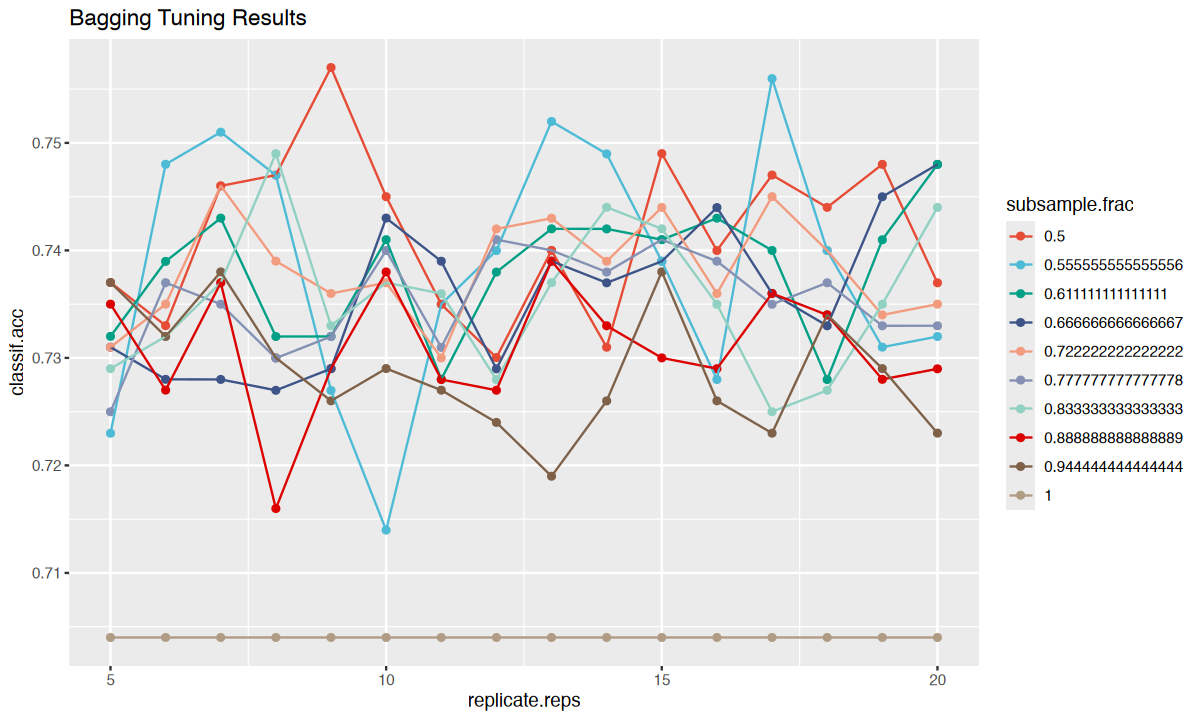

In [92]:
# 提取数据
df <- instance$archive %>%
  as.data.table() %>%
  select(replicate.reps, subsample.frac, classif.acc) %>%
  mutate(
    replicate.reps = as.integer(replicate.reps),
    subsample.frac = as.factor(subsample.frac)
  ) %>%
  arrange(desc(classif.acc))

# 绘图
library(ggsci)
ggplot(df, aes(x = replicate.reps, y = classif.acc, color = subsample.frac)) +
  geom_point() +
  geom_line() +
  labs(title = "Bagging Tuning Results") +
  scale_color_npg()

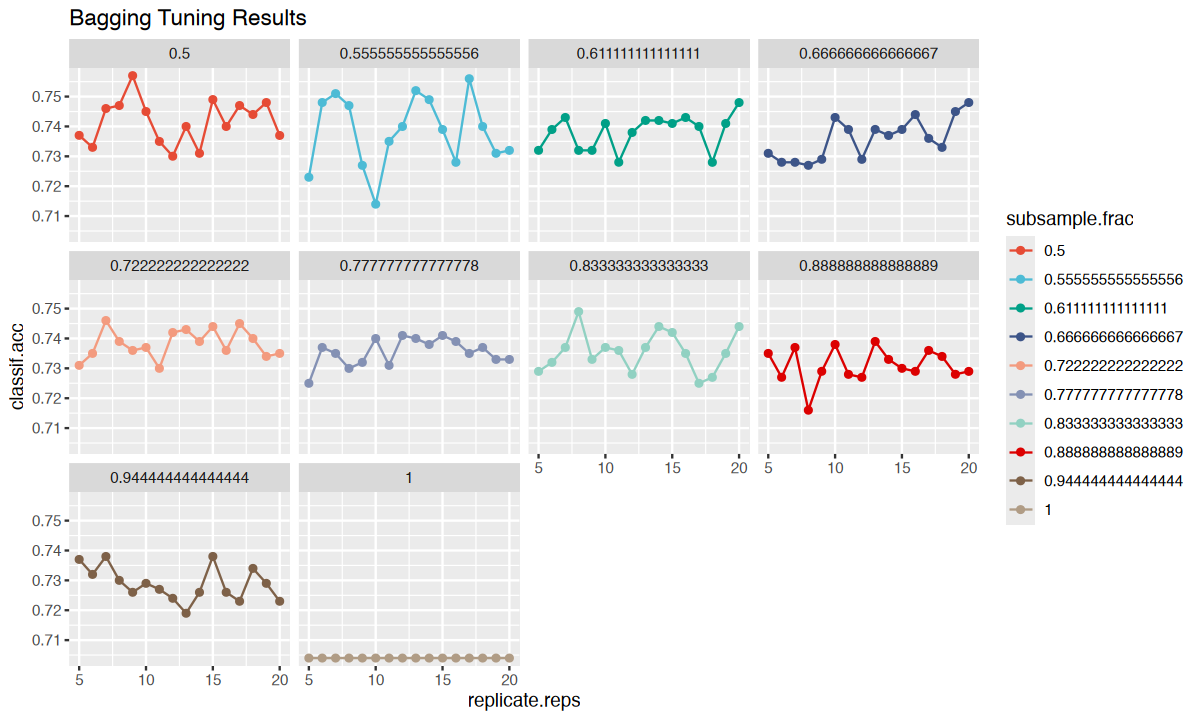

In [ ]:
# 使用分面
ggplot(
  df,
  aes(
    x = replicate.reps,
    y = classif.acc,
    color = subsample.frac
  )
) +
  geom_point() +
  geom_line() +
  labs(title = "Bagging Tuning Results") +
  facet_wrap(~ subsample.frac) +
  scale_color_npg()

# Stacking

In [ ]:
# 手动实现Stacking
# 定义任务
tsk_sonar <- tsk("sonar")

# 定义学习器
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")
po_rpart_cv <- po(
  "learner_cv",
  learner = lrn_rpart,
  resampling.folds = 2,
  id = "rpart_cv"
)

lrn_knn <- lrn("classif.kknn", predict_type = "prob")
po_knn_cv <- po(
  "learner_cv",
  learner = lrn_knn,
  resampling.folds = 2,
  id = "knn_cv"
)

lrn_glmnet <- lrn("classif.glmnet", predict_type = "prob")
po_glmnet_cv <- po(
  "learner_cv",
  learner = lrn_glmnet,
  resampling.folds = 2,
  id = "glmnet_cv"
)

# 合并0级学习器并合并特征
gr_combined <- gunion(list(
  po_rpart_cv,
  po_knn_cv,
  po_glmnet_cv
)) %>>%
  po("featureunion")

# 默认产生每一类概率，只需收集一类
gr_stack <- gr_combined %>>%
  po("select", selector = selector_grep("\\.M$"))

# 加入1级学习器
gr_stack <- gr_stack %>>% po("learner", lrn("classif.log_reg"))

# 转化为学习器
lrn_stack <- as_learner(gr_stack)

# 训练Stacking学习器
lrn_stack$train(tsk_sonar)

# 预测
pred_stack <- lrn_stack$predict(tsk_sonar)

# 评估
pred_stack$score(msr("classif.acc"))

# classif.acc: 0.990384615384615

INFO  [17:41:42.670] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 1/2)
INFO  [17:41:42.796] [mlr3] Applying learner 'classif.rpart' on task 'sonar' (iter 2/2)
INFO  [17:41:42.981] [mlr3] Applying learner 'classif.kknn' on task 'sonar' (iter 1/2)
INFO  [17:41:43.068] [mlr3] Applying learner 'classif.kknn' on task 'sonar' (iter 2/2)
INFO  [17:41:44.062] [mlr3] Applying learner 'classif.glmnet' on task 'sonar' (iter 1/2)


Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp glmnet_cv's $train()"


INFO  [17:41:44.164] [mlr3] Applying learner 'classif.glmnet' on task 'sonar' (iter 2/2)


Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp glmnet_cv's $train()"
Warning message in glmnet_get_lambda(self, pv):
"Multiple lambdas have been fit. Lambda will be set to 0.01 (see parameter 's').
This happened PipeOp glmnet_cv's $predict()"


classif.acc 
  0.9903846

In [104]:
gr_stack <- ppl(
  "stacking",
  base_learners = lrns(
    c("classif.rpart", "classif.kknn", "classif.glmnet")
  ),
  folds = 3,
  super_learner = lrn("classif.log_reg")
)